## Plots for thesis from training process

In [1]:
import numpy as np
from glob import glob
import os, sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
source_path = '../../../datasets/QM9/xyz_c5h4n2o2/'
all_file_paths = glob(os.path.join(source_path, '*.xyz'))
len(all_file_paths)


509

In [2]:
scripts_path = "../../../scripts"
if scripts_path not in sys.path:
    sys.path.append(scripts_path)
from to_cache import density_fock_overlap

In [ ]:
from pyscf import gto, scf
# ret = density_fock_overlap(filepath = '../../../datasets/QM9/xyz_c5h4n2o2/dsgdb9nsd_022700.xyz',
#                          filename = "dsgdb9nsd_022700",
#                          method = "dft",
#                          basis = "sto-3g",
#                          functional = "b3lypg",
#                          guess = "minao",
#                          backend = "pyscf",
#                          cache = "../../../datasets/QM9/out/c5h4n2o2-sto-3g-b3lyp")
mol = gto.M(atom='../../../datasets/QM9/xyz_c5h4n2o2/dsgdb9nsd_022700.xyz', basis='sto-3g')
mol.basis = 'sto-3g'  # Changing the basis set after initializing the molecule has no effect
mol.build()
mf = scf.RKS(mol)
mf.xc = 'b3lypg'  # This line has no effect because RHF does not use xc functionals
mf.kernel()
density = mf.make_rdm1()

mo_coeff = mf.mo_coeff
for i in range(mol.nao_nr()): 
    ao_label = mol.ao_labels()[i]
    print(f"{i}: {ao_label}")


converged SCF energy = -446.771228172326


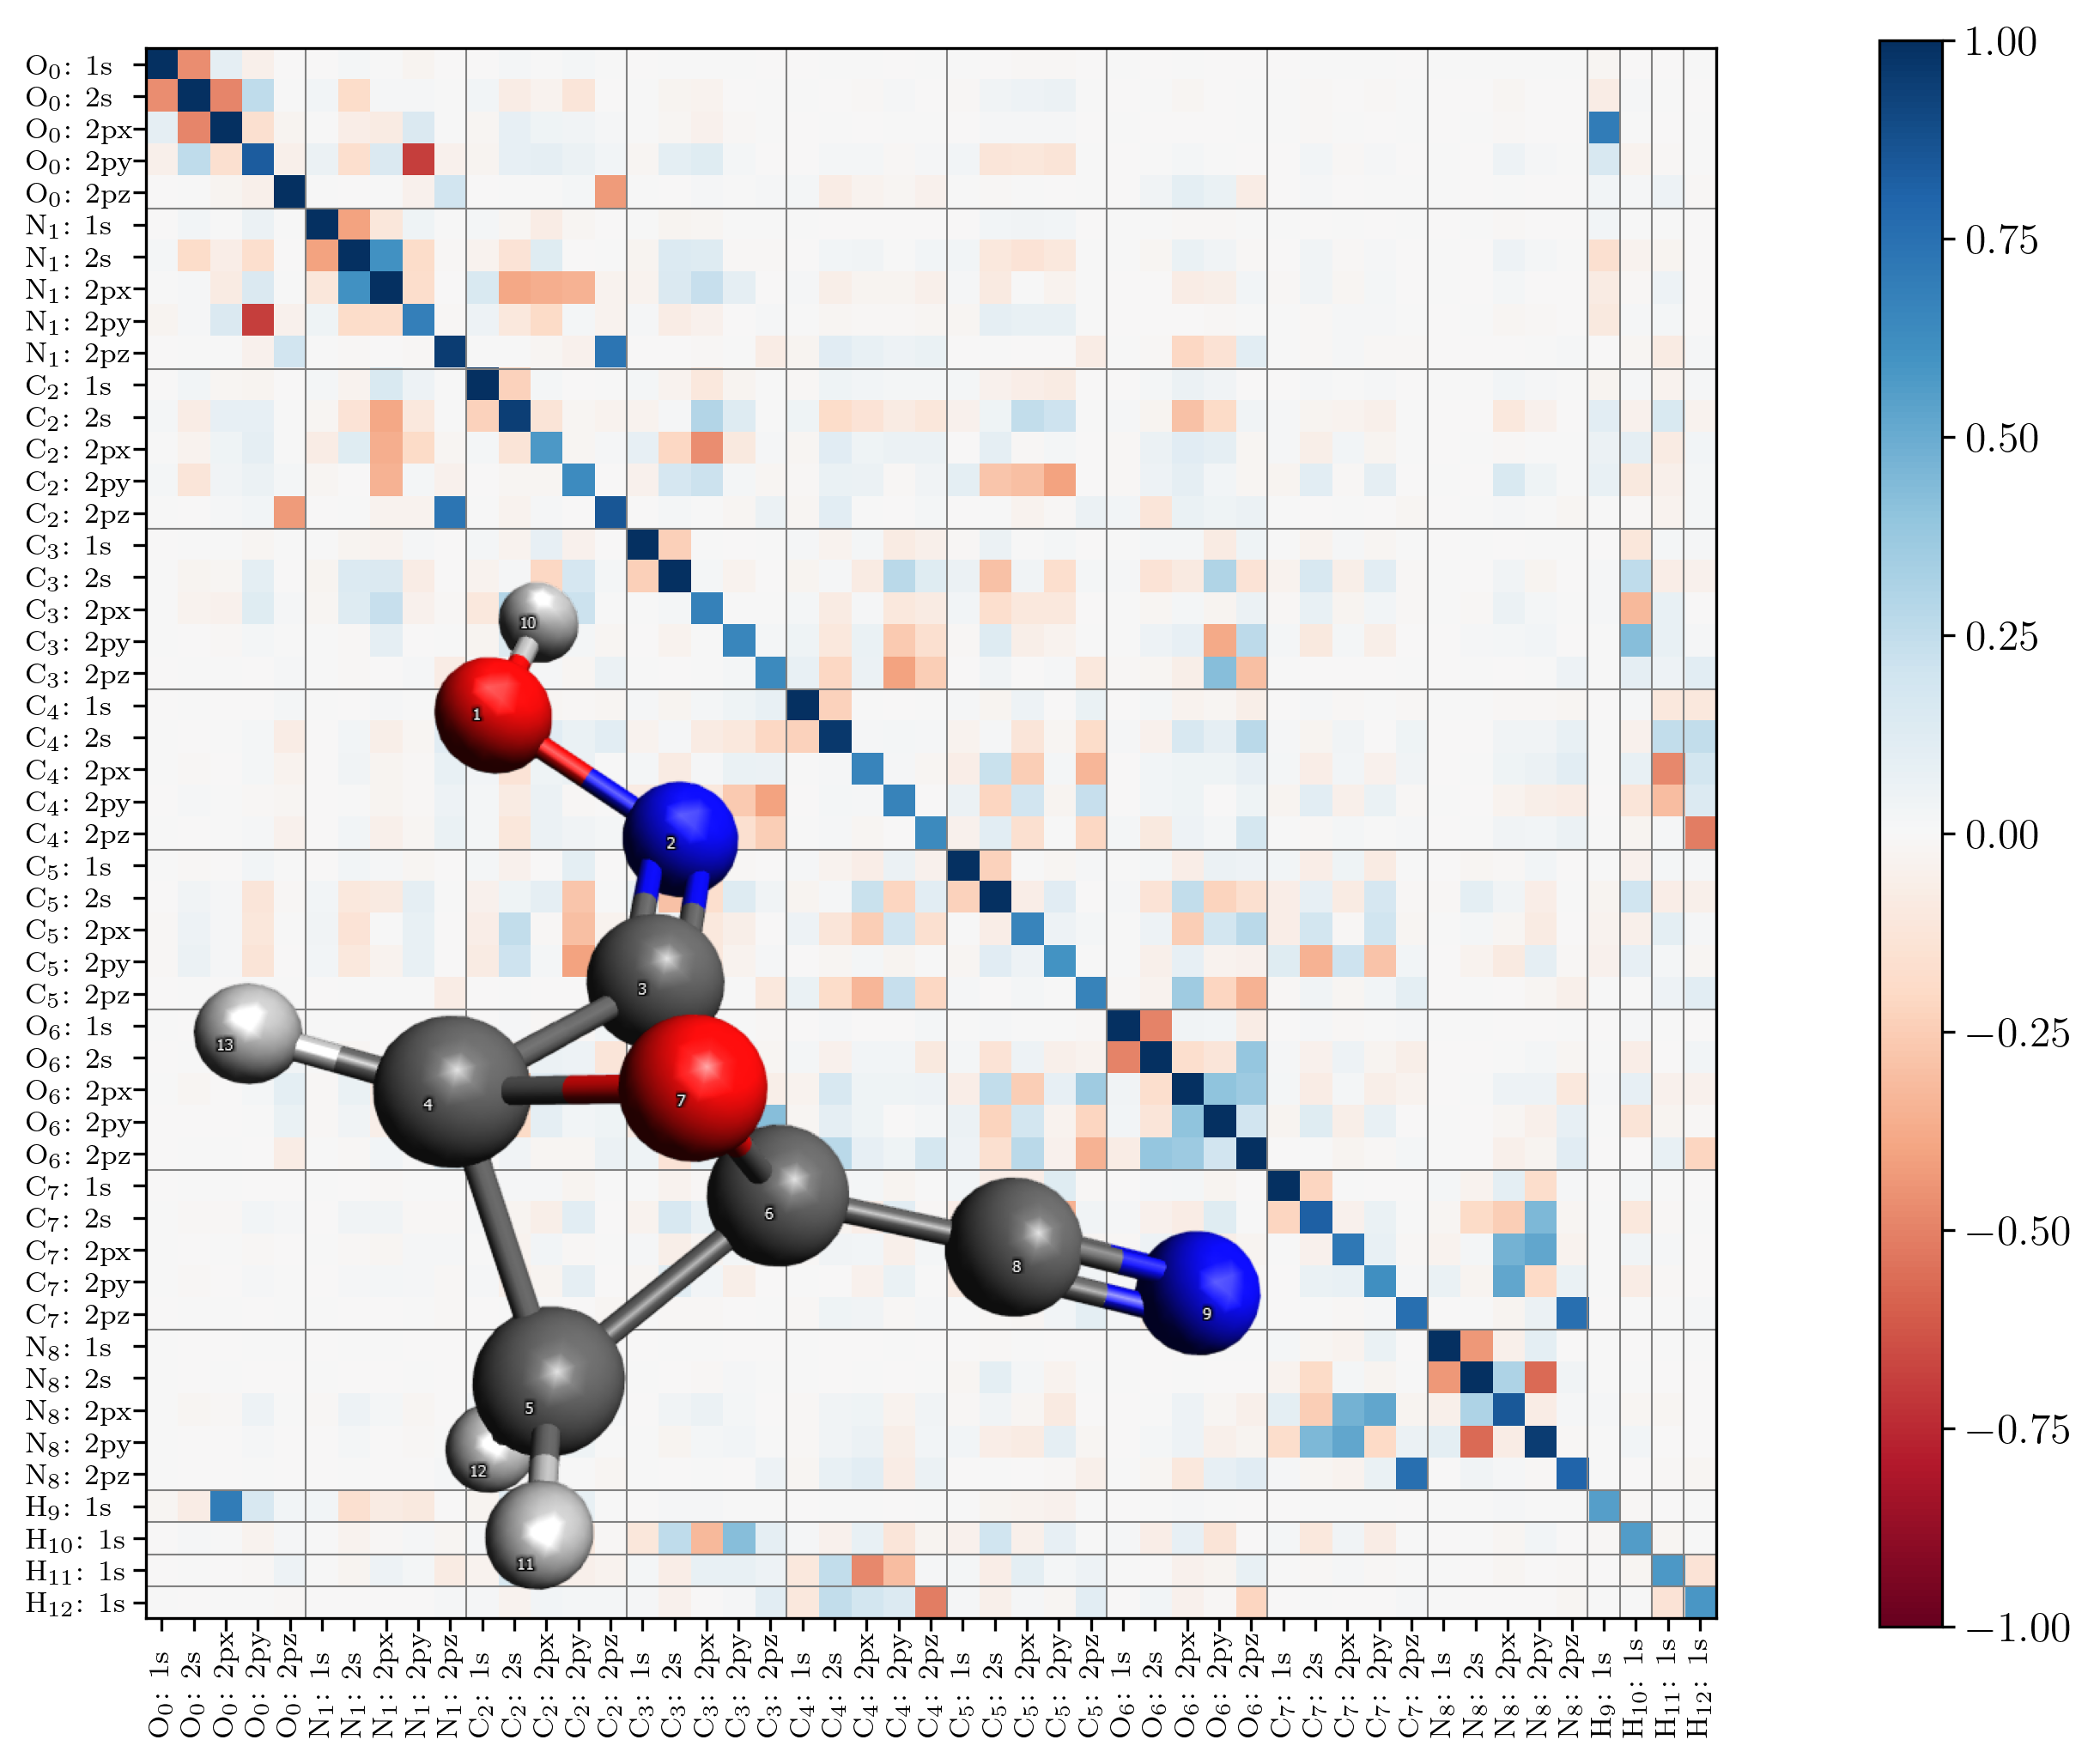

In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
sys.path.append("../../scripts/")
from plt_config import use_latex, TU_GREY, TU_RED
use_latex()

def plotwithlabels(X, M, plotname, overlay=None):
    fig, ax = plt.subplots(1, 2, figsize=(9, 8), gridspec_kw={'width_ratios': [25, 1]})
    im = ax[0].imshow(X, cmap='RdBu', vmin=-1, vmax=1)

    # Add labels to the x and y axes
    labels_ = [f"{label.split()[1]}$_{{{label.split()[0]}}}$:\t{{{label.split()[2]}}}" for label in M.ao_labels()]

    ax[0].set_xticks(range(len(labels_)))
    ax[0].set_xticklabels(labels_, rotation=90, fontsize=8, va='bottom')
    ax[0].set_yticks(range(len(labels_)))
    ax[0].set_yticklabels(labels_, fontsize=8, ha = 'left')
    ax[0].tick_params(axis='x', which='both', labelbottom=True, pad=30)
    ax[0].tick_params(axis='y', which='both', labelleft=True, pad=30)
    ax[0].grid(False)
    ao_labels = M.ao_labels()
    atom_names = [label.split()[1] + label.split()[0] for label in ao_labels]
    boundaries = [i for i in range(1, len(atom_names)) if atom_names[i] != atom_names[i-1]]

    # Gridlinien setzen
    for b in boundaries:
        ax[0].axhline(b - 0.5, color='gray', lw=0.5)
        ax[0].axvline(b - 0.5, color='gray', lw=0.5)
    cb = plt.colorbar(im, cax=ax[1])
    cb.ax.tick_params(labelsize=12)
    cb.ax.grid(False)
    if overlay is not None:
        overaly_img = mpimg.imread(overlay)
        imagebox = OffsetImage(overaly_img, zoom=0.4)
        ab = AnnotationBbox(imagebox, (0.37, 0.33), frameon=False, xycoords='axes fraction')
        ax[0].add_artist(ab)
    plt.savefig(f"../../fig/c5h4n2o2/{plotname}.pdf", bbox_inches="tight", dpi=600)
plotwithlabels(density, mol, "density_dsgdb9nsd_022700", 
               overlay="../../fig/c5h4n2o2/dsgdb9nsd_022700_structure_nobg.png")

In [36]:
from pyscf import gto, scf

mol = gto.M(atom='O 0 0 0; H 0 0 1; H 1 0 0', basis='sto-3g')
mf = scf.RHF(mol)
mf.kernel()
dm = mf.make_rdm1()
mo_coeff = mf.mo_coeff
for i in range(mol.nao_nr()): 
    ao_label = mol.ao_labels()[i]
    print(f"{i}: {ao_label}")

converged SCF energy = -74.9611711378677
0: 0 O 1s    
1: 0 O 2s    
2: 0 O 2px   
3: 0 O 2py   
4: 0 O 2pz   
5: 1 H 1s    
6: 2 H 1s    
